<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 4

## San Francisco Data

---

[San Francisco provides a wealth of data on the city to the public.](https://data.sfgov.org/) Project 4 is all about exploring this data and modeling interesting relationships with regression.

Project 4 is also much more open-ended than the previous projects. You are more responsible for finding things about the data that interest you, coming up with your own hypothesis about it, and reporting on the analysis you carry out. That being said, there are still specific requirements and restrictions on the type of models you will be constructing.

---

## Notes on the data

We have gone through the above website and pulled out a variety of different datasets that we think are particularly interesting. Some of the datasets are from external sources as well, but all are related to San Francisco. A high level overview of data folders is provided after the project requirements section.

**There is a lot of different data. You are _NOT_ expected to explore all of it or include all of it in analyses.** The point of the project is to focus on aspects of San Francisco that are particularly interesting to you from a modeling point of view. 

**The uncompressed data is a large filesize.** Even the compressed data is pretty large. The data is compressed into a .7z format which has one of the smallest filesizes available. You will likely need a 3rd party app to extract it. 

### Recommended Utilities for .7z
- For OSX [Keka](http://www.kekaosx.com/en/) or [The Unarchiver](http://wakaba.c3.cx/s/apps/unarchiver.html). 
- For Windows [7-zip](http://www.7-zip.org/) is the standard. 
- For Linux try the `p7zip` utility.  `sudo apt-get install p7zip`.

---

## Project requirements

**You will be performing 4 different sections of analysis on the San Francisco data.**

**Models must be regression. This means that your target variable needs to be numeric/continuous**

Do not perform classification models – this will be the topic of week 4.


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 1. Choose a dataset or datasets of interest to you and perform EDA

---

1. Explain what the data is. This may include multiple csv files. Some of this data has hard to understand codes representing the variables. Nearly all data is pulled from https://data.sfgov.org/ so this is a very good resource for determining what the data is.
- Clean the data.
- Develop and state clearly a hypothesis about the data that you would want to test.
- Create some initial visualizations on the portions of the data relevant to your hypothesis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sm
import seaborn as sns
%matplotlib inline

In [2]:
data_info = '../../../../dsi-sf-2/datasets/san_francisco/san_francisco/parks/park_info.csv'
data_donations = '../../../../dsi-sf-2/datasets/san_francisco/san_francisco/parks/park_donations.csv'
data_scores = '../../../../dsi-sf-2/datasets/san_francisco/san_francisco/parks/park_scores.csv'

In [3]:
info = pd.read_csv(data_info)
donations = pd.read_csv(data_donations)
scores = pd.read_csv(data_scores)

info_df = pd.DataFrame(info)
donations_df = pd.DataFrame(donations)
scores_df = pd.DataFrame(scores)

In [5]:
scores_df.sort_values(by='ParkID')
scores_df.head()

,ParkID,PSA,Park,FQ,Score
0,86,PSA4,Carl Larsen Park,FY05Q3,0.795
1,13,PSA4,Junipero Serra Playground,FY05Q3,0.957
2,9,PSA4,Rolph Nicol Playground,FY05Q3,0.864
3,117,PSA2,Alamo Square,FY05Q4,0.857
4,60,PSA6,Jose Coronado Playground,FY05Q4,0.859


In [6]:
donations_df.head()

,Close Date,Account Name,Description,Amount,Type
0,07/08/2014 12:00:00 AM,Glen Park Association,To support botanical signs at the Sunnyside Co...,$500.00,Cash
1,07/09/2014 12:00:00 AM,USTA NorCAL,To support HITS tennis programming and provide...,$2050.00,Cash
2,08/21/2014 12:00:00 AM,Walter S. Johnson Foundation,To support grounds maintenance at the Walter S...,$5000.00,Cash
3,09/04/2014 12:00:00 AM,Kaiser Permanente,To support the Golden Gate Park Senior Center ...,$1000.00,Cash
4,09/08/2014 12:00:00 AM,San Francisco Parks Alliance (SFPA),To support landscape improvements to Kezar Tri...,$1732.08,Cash


In [7]:

info_df.drop(info_df.index[[0]], inplace=True)
info_df.head()

,ParkName,ParkType,ParkServiceArea,PSAManager,email,Number,Zipcode,Acreage,SupDist,ParkID,Location 1,Lat
1,10TH AVE/CLEMENT MINI PARK,Mini Park,PSA 1,"Elder, Steve",steven.elder@sfgov.org,(415) 601-6501,94118.0,0.66,1.0,156.0,"351 9th Ave\nSan Francisco, CA\n(37.78184397, ...",NaN
2,15TH AVENUE STEPS,Mini Park,PSA 4,"Sheehy, Chuck",charles.sheehy@sfgov.org,(415) 218-2226,94122.0,0.26,7.0,185.0,"15th Ave b w Kirkham\nSan Francisco, CA\n(37.7...",NaN
3,24TH/YORK MINI PARK,Mini Park,PSA 6,"Field, Adrian",adrian.field@sfgov.org,(415) 717-2872,94110.0,0.12,9.0,51.0,"24th\nSan Francisco, CA\n(37.75306042, -122.40...",NaN
4,29TH/DIAMOND OPEN SPACE,Neighborhood Park or Playground,PSA 5,"O'Brien, Teresa",teresa.o'brien@sfgov.org,(415) 819-2699,94131.0,0.82,8.0,194.0,"Diamond\nSan Francisco, CA\n(37.74360211, -122...",NaN
5,ADAM ROGERS PARK,Neighborhood Park or Playground,PSA 3,"Watkins, Robert",robert.watkins@sfgov.org,(415) 819-6138,94124.0,2.74,10.0,46.0,"Ingalls\nSan Francisco, CA\n(37.73101645, -122...",NaN


In [8]:
def return_park_type(x):
    if x == 'Mini Park':
        return 1
    elif x=='Neighborhood Park or Playground':
        return 2
    elif x=='Community Garden':
        return 3
    elif x=='Regional Park':
        return 4
    elif x=='Family Camp':
        return 5
    elif x=='Concession':
        return 6
    elif x=='Civic Plaza or Square':
        return 7
    elif x== 'Parkway':
        return 8
    elif x=='Zoological Garden':
        return 9
    else:
        return 0
    
info_df['ParkType'] = info_df['ParkType'].map(return_park_type)

In [9]:
info_df['ParkType'].value_counts()

2    131
1     45
4     19
3     18
7     10
8      2
6      2
9      1
5      1
Name: ParkType, dtype: int64

In [10]:
info_merged = info_df.merge(scores_df, how='inner', on='ParkID')
info_merged.head()

mean_score_by_park = info_merged.groupby('ParkID')[['Score']].apply(np.mean).reset_index()

mean_score_by_park.sort_values(by='Score', ascending=False, inplace=True)

park_by_mean_score = info_df.merge(mean_score_by_park, how='left', on='ParkID')

park_by_mean_score.head()

,ParkName,ParkType,ParkServiceArea,PSAManager,email,Number,Zipcode,Acreage,SupDist,ParkID,Location 1,Lat,Score
0,10TH AVE/CLEMENT MINI PARK,1,PSA 1,"Elder, Steve",steven.elder@sfgov.org,(415) 601-6501,94118.0,0.66,1.0,156.0,"351 9th Ave\nSan Francisco, CA\n(37.78184397, ...",NaN,0.910440
1,15TH AVENUE STEPS,1,PSA 4,"Sheehy, Chuck",charles.sheehy@sfgov.org,(415) 218-2226,94122.0,0.26,7.0,185.0,"15th Ave b w Kirkham\nSan Francisco, CA\n(37.7...",NaN,NaN
2,24TH/YORK MINI PARK,1,PSA 6,"Field, Adrian",adrian.field@sfgov.org,(415) 717-2872,94110.0,0.12,9.0,51.0,"24th\nSan Francisco, CA\n(37.75306042, -122.40...",NaN,0.978033
3,29TH/DIAMOND OPEN SPACE,2,PSA 5,"O'Brien, Teresa",teresa.o'brien@sfgov.org,(415) 819-2699,94131.0,0.82,8.0,194.0,"Diamond\nSan Francisco, CA\n(37.74360211, -122...",NaN,0.896750
4,ADAM ROGERS PARK,2,PSA 3,"Watkins, Robert",robert.watkins@sfgov.org,(415) 819-6138,94124.0,2.74,10.0,46.0,"Ingalls\nSan Francisco, CA\n(37.73101645, -122...",NaN,0.807344


In [11]:
info_df['ParkName'] = info_df['ParkName'].map(lambda x: x.lower())

info_df.head()

,ParkName,ParkType,ParkServiceArea,PSAManager,email,Number,Zipcode,Acreage,SupDist,ParkID,Location 1,Lat
1,10th ave/clement mini park,1,PSA 1,"Elder, Steve",steven.elder@sfgov.org,(415) 601-6501,94118.0,0.66,1.0,156.0,"351 9th Ave\nSan Francisco, CA\n(37.78184397, ...",NaN
2,15th avenue steps,1,PSA 4,"Sheehy, Chuck",charles.sheehy@sfgov.org,(415) 218-2226,94122.0,0.26,7.0,185.0,"15th Ave b w Kirkham\nSan Francisco, CA\n(37.7...",NaN
3,24th/york mini park,1,PSA 6,"Field, Adrian",adrian.field@sfgov.org,(415) 717-2872,94110.0,0.12,9.0,51.0,"24th\nSan Francisco, CA\n(37.75306042, -122.40...",NaN
4,29th/diamond open space,2,PSA 5,"O'Brien, Teresa",teresa.o'brien@sfgov.org,(415) 819-2699,94131.0,0.82,8.0,194.0,"Diamond\nSan Francisco, CA\n(37.74360211, -122...",NaN
5,adam rogers park,2,PSA 3,"Watkins, Robert",robert.watkins@sfgov.org,(415) 819-6138,94124.0,2.74,10.0,46.0,"Ingalls\nSan Francisco, CA\n(37.73101645, -122...",NaN


In [12]:

donations_df.head()

print donations_df.head()
len(donations_df)

               Close Date                         Account Name  \
0  07/08/2014 12:00:00 AM                Glen Park Association   
1  07/09/2014 12:00:00 AM                          USTA NorCAL   
2  08/21/2014 12:00:00 AM         Walter S. Johnson Foundation   
3  09/04/2014 12:00:00 AM                    Kaiser Permanente   
4  09/08/2014 12:00:00 AM  San Francisco Parks Alliance (SFPA)   

                                         Description    Amount  Type  
0  To support botanical signs at the Sunnyside Co...   $500.00  Cash  
1  To support HITS tennis programming and provide...  $2050.00  Cash  
2  To support grounds maintenance at the Walter S...  $5000.00  Cash  
3  To support the Golden Gate Park Senior Center ...  $1000.00  Cash  
4  To support landscape improvements to Kezar Tri...  $1732.08  Cash  


363

In [13]:
len(scores_df)

5495

In [14]:
from collections import Counter
#donations csv isn't very reliable

truelist = []
for x in donations_df['Description']:
    if 'Park' in x:
        truelist.append('true')
    else:
        truelist.append('false')
Counter(truelist)

Counter({'false': 293, 'true': 70})

In [15]:
meanbyscore_df = park_by_mean_score[park_by_mean_score['Score'] > 0]

meanbyscore_df['Score'].isnull().value_counts()

meanbyscore_df = meanbyscore_df[meanbyscore_df['Acreage'] < 100]

meanbyscore_df = meanbyscore_df[meanbyscore_df['Acreage'] > 0]
meanbyscore_df.head()
meanbyscore_df.drop('ParkName', axis=1, inplace=True)
meanbyscore_df.drop('ParkServiceArea', axis=1, inplace=True)
meanbyscore_df.drop('PSAManager', axis=1, inplace=True)
meanbyscore_df.drop('email', axis=1, inplace=True)
meanbyscore_df.drop('Lat', axis=1, inplace=True)
meanbyscore_df.drop('Location 1', axis=1, inplace=True)
meanbyscore_df.drop('Number', axis=1, inplace=True)
meanbyscore_df.drop('Zipcode', axis=1, inplace=True)

#meanbyscore_df['Score'] = meanbyscore_df[meanbyscore_df['Score'] > 0]

meanbyscore_df.head()

print meanbyscore_df.isnull().sum()

print (meanbyscore_df['Acreage'] < 0).unique()

ParkType    0
Acreage     0
SupDist     0
ParkID      0
Score       0
dtype: int64
[False]


In [16]:
meanbyscore_df.corr()

,ParkType,Acreage,SupDist,ParkID,Score
ParkType,1.000000,0.292123,-0.275288,-0.064727,0.099800
Acreage,0.292123,1.000000,0.039233,0.026781,-0.030019
SupDist,-0.275288,0.039233,1.000000,0.119276,-0.228060
ParkID,-0.064727,0.026781,0.119276,1.000000,-0.053397
Score,0.099800,-0.030019,-0.228060,-0.053397,1.000000


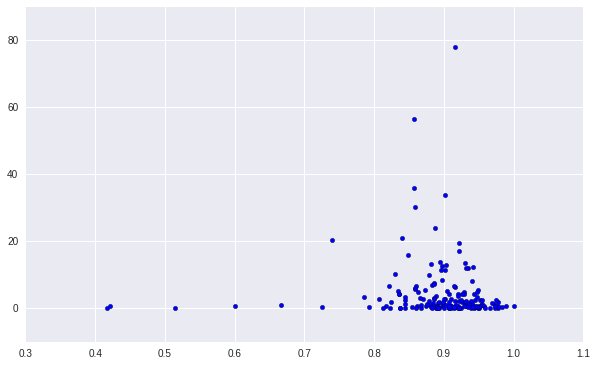

In [17]:
fig = plt.figure(figsize=(10,6))
fig = plt.scatter(data=meanbyscore_df, x='Score', y='Acreage')

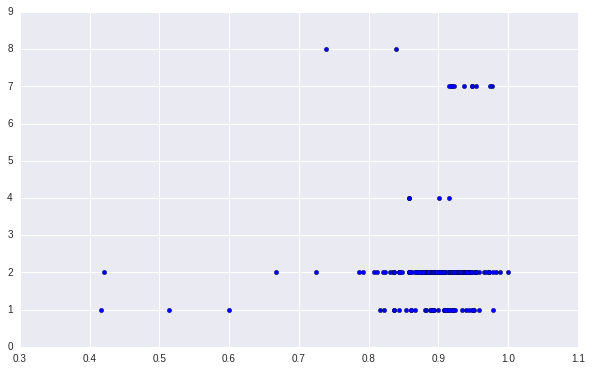

In [20]:
fig_1 = plt.figure(figsize=(10,6))
#catagorical, cannot run a regressoin on parktype
fig_1 = plt.scatter(data=meanbyscore_df, x='Score', y='ParkType')

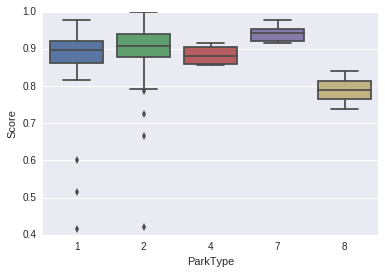

In [21]:
ax = sns.boxplot(data=meanbyscore_df, x='ParkType', y='Score', orient='v')

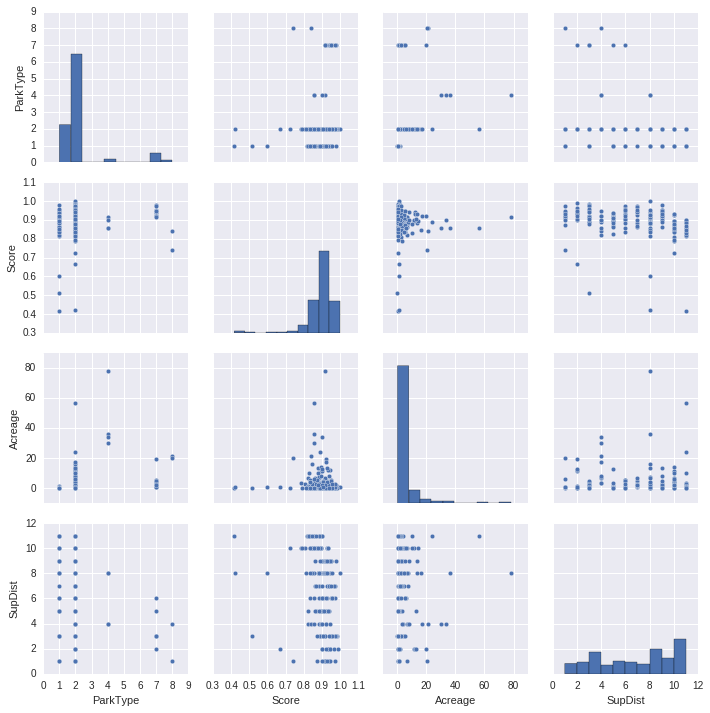

In [22]:
ax1 = sns.pairplot(meanbyscore_df, vars=['ParkType', 'Score', 'Acreage', 'SupDist'])

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 2. Construct and evaluate a linear regression model on the data

---

1. State the variables that are predictors in your linear regression and the target variable.
- Investigate and remove any outliers or other problems in your data. _This is a subjective process._
- Construct a linear regression model.
- Evaluate the model. How does the $R^2$ of the overall model compare to cross-validated $R^2$. What do the differences in $R^2$ mean?
  - Use test / train split
  - Use K-Folds
  - Compare and explain your results with both
- Visualize the evaluation metrics of your analysis in clear charts.
- Summarize your results in the context of your hypothesis. Frame this as if you are presenting to non-technical readers.


In [23]:
def plot_regression_wbaseline(x, y, yhat, labelx, labely):
    
    fig = plt.figure(figsize=(7,7))
    ax = fig.gca()
    
    ymean = np.mean(y)
    
    #data
    ax.scatter(x, y, color='purple', s=70, label='true y')
    
    min_x, max_x = np.min(x), np.max(x)
    min_yhat = np.min(yhat)
    max_yhat = np.max(yhat)
    
    #regression line
    ax.plot([min_x, max_x], [min_yhat, max_yhat], color='darkred',
            linewidth=4, alpha=0.7, label='regression model')
    #baseline
    ax.plot([min_x, max_x], [ymean, ymean], color='steelblue',
            linewidth=4, alpha=0.7, label='baseline model')
    
    ax.set_xlabel(labelx, fontsize=16)
    ax.set_ylabel(labely, fontsize=16)
    
    plt.legend(loc='upper left')
    
    plt.show()

In [24]:
from sklearn import linear_model, metrics
import patsy

(171, 1)
(171, 1)


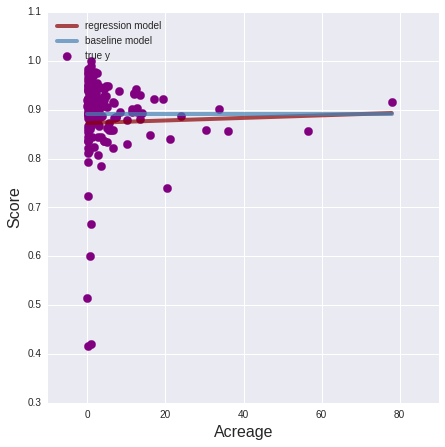

(114, 1) (114, 1)
(57, 1) (57, 1)
Regression score:  0.00120201362316
Cross-validated scores: -0.149397455091


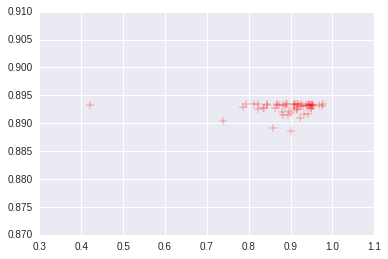

In [25]:
#I am trying to predict park score by the size of the park (acreage),
#and by the park type, 1-9

from sklearn.cross_validation import cross_val_score, cross_val_predict, train_test_split


lm = linear_model.LinearRegression()
y, X = patsy.dmatrices(formula_like='Score ~ Acreage - 1',
                       data = meanbyscore_df,
                       return_type='dataframe')
print X.shape
print y.shape

model = lm.fit(X,y)
predictions = model.predict(X)


plot_regression_wbaseline(X, y, predictions, 'Acreage', 'Score')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
print X_train.shape, y_train.shape
print X_test.shape, y_test.shape


model_1 = lm.fit(X_train, y_train)

print 'Regression score: ', model_1.score(X_test, y_test)

predictions = model_1.predict(X_test)

plt.scatter(y_test, predictions, s=50, c='r', marker='+')

predictions = cross_val_predict(model, X_test, y_test, cv=5)

## The line / model

scores = cross_val_score(model_1, X_test, y_test, cv=5)
print "Cross-validated scores:", np.mean(scores)

In [26]:
'''
By the regression it is clear that Acreage isn't a determining factor in park score,
as there is a cluster of parks whose acreage is < 10 that have great scores compared to other, larger parks
'''

"\nBy the regression it is clear that Acreage isn't a determining factor in park score,\nas there is a cluster of parks whose acreage is < 10 that have great scores compared to other, larger parks\n"

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 2.2 Explain $R^2$ vs. mean squared error (MSE)

---

1. If you have negative $R^2$ values in cross-validation, what does this mean? 
2. Why can $R^2$ be negative when the model is tested on new data?

In [27]:
'''
1. If you have negative r^2 values in cross validation that just means that your model is a bad fit for whatever data you're using
it is  somewhat random depending on what cross validation method you use, Kfolds, train test split, however, what method you use to cross validate shouldn't make the difference between 
the values being negative or positive unless the r^2 value was already within a range of -1 --> 1

2. R^2 can be negative when  tested on new data if your model is not a good fit of the new data, this is possible, however not desired.

'''

"\n1. If you have negative r^2 values in cross validation that just means that your model is a bad fit for whatever data you're using\nit is  somewhat random depending on what cross validation method you use, Kfolds, train test split, however, what method you use to cross validate shouldn't make the difference between \nthe values being negative or positive unless the r^2 value was already within a range of -1 --> 1\n\n2. R^2 can be negative when  tested on new data if your model is not a good fit of the new data, this is possible, however not desired.\n\n"

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 3. Combine multiple sources of data and evaluate a model with regularized regression

---

**I recommend having many predictors to see benefits from regularization methods, but it's up to you.**

1. Use _NEW_ sources of data for this section. It should not be related to your analysis/hypothesis from section 1.
- Like in part 1, you should state a hypothesis and perform data cleaning and EDA _only_ on the relevant portions of your data. Don't waste time!
- Construct and evaluate different models with cross-validated $R^2$. Compare LinearRegression, Lasso, Ridge, and ElasticNet. Find the optimal hyperparameters (alpha, l1_ratio) using gridsearch.
- Report on which model is best, and why that might be the case (hint: does your data have multicollinearity? Irrelevant variables? Both?)
- Plot visuals that compare the performance of the four models.


In [28]:
#I have a hypothesis of businesses becoming more successful in passing health inspections
#as they gain more and more inspections, whether they passed or not.

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
businesses_path = '../../../../dsi-sf-2/datasets/san_francisco/san_francisco/yelp_sf_healthcode_violations/businesses.csv'
legend_path = '../../../../dsi-sf-2/datasets/san_francisco/san_francisco/yelp_sf_healthcode_violations/code_legend.csv'
inspection_path = '../../../../dsi-sf-2/datasets/san_francisco/san_francisco/yelp_sf_healthcode_violations/inspections.csv'
violations_path = '../../../../dsi-sf-2/datasets/san_francisco/san_francisco/yelp_sf_healthcode_violations/violations.csv'

business_df = pd.read_csv(businesses_path)
legend_df = pd.read_csv(legend_path)
inspection_df = pd.read_csv(inspection_path)
violations_df = pd.read_csv(violations_path)

In [31]:
businesscpy = business_df

businesscpy = businesscpy.merge(inspection_df, on='business_id', how='inner')

meanscorebybusiness= businesscpy.groupby('business_id')[['score']].apply(np.mean).reset_index()

meanscorebybusiness.head()


,business_id,score
0,10,93.000000
1,19,94.666667
2,24,97.000000
3,31,99.000000
4,45,88.666667


In [32]:
businessbymeanscore = business_df.merge(meanscorebybusiness, on='business_id', how='left')

businesses_by_inspeccount = pd.DataFrame(inspection_df['business_id'].value_counts()).reset_index()

businesses_by_inspeccount.columns=['business_id', 'numinspections']

businesses_by_inspeccount.head()

tester_frame = meanscorebybusiness.merge(businesses_by_inspeccount, on='business_id', how='left')

tester_frame = tester_frame[tester_frame['numinspections'] < 8]

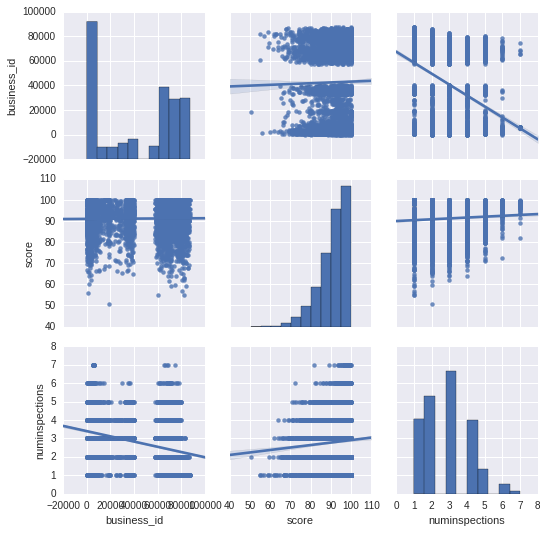

In [33]:
sns.pairplot(data=tester_frame, kind='reg')

(array([ 1015.,  1320.,     0.,  1666.,     0.,  1004.,   334.,     0.,
          129.,    42.]),
 array([ 1. ,  1.6,  2.2,  2.8,  3.4,  4. ,  4.6,  5.2,  5.8,  6.4,  7. ]),
 <a list of 10 Patch objects>)

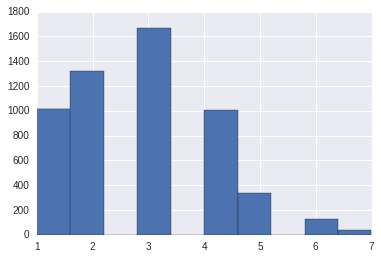

In [34]:
plt.hist(x='numinspections', data=tester_frame)

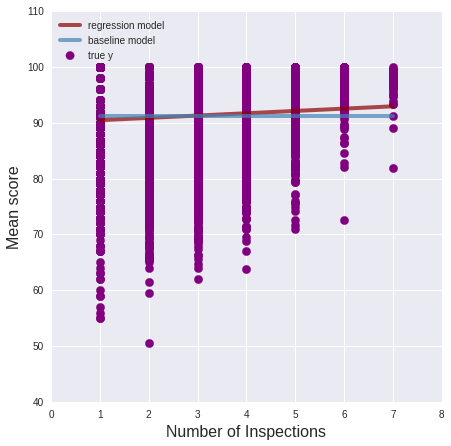

In [35]:
lm = linear_model.LinearRegression()
y, X = patsy.dmatrices(formula_like='score ~ numinspections -1',
                       data = tester_frame,
                       return_type='dataframe')
model = lm.fit(X,y)
predictions = model.predict(X)
plot_regression_wbaseline(X, y, predictions, 'Number of Inspections', 'Mean score')

In [36]:
'''
In conclusion, the regression does not fit as a result of there being a high concentration of businesses
that only recieved between one and five total inspections in the dataset, despite the line, the graph
would suggest that as businesses gain more and more opprotunities to do successfully they will reflect
that in their mean score. However this is not valid as the sample size is skewed towards businesses that have had
fewer reportable accounts of inspections
'''

'\nIn conclusion, the regression does not fit as a result of there being a high concentration of businesses\nthat only recieved between one and five total inspections in the dataset, despite the line, the graph\nwould suggest that as businesses gain more and more opprotunities to do successfully they will reflect\nthat in their mean score. However this is not valid as the sample size is skewed towards businesses that have had\nfewer reportable accounts of inspections\n'

In [37]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV, ElasticNet
from sklearn import grid_search


num_alpha = np.arange(1, 200, 5)

search_parameters = {
    'alpha': num_alpha,
    'fit_intercept':  [True, False], 
    'normalize':      [False, True]
}


lasso = Lasso()
estimator = grid_search.GridSearchCV(lasso, search_parameters, cv=5)
results = estimator.fit(X, y)

print 'LASSO ----------'
print 'Best est: ', results.best_estimator_
print 'Best params: ', results.best_params_
print 'Best  score: ', results.best_score_

ridge = Ridge()
search_params = {
    'alpha' : np.logspace(0, 10, 2)
}



ridge_estimate = grid_search.GridSearchCV(ridge, search_params, cv=5)


r_results = ridge_estimate.fit(X,y)

print 'RIDGE -------'
print r_results.best_estimator_
print 'Best Alpha: ', r_results.best_params_
print 'Best score: ', r_results.best_score_

elas = ElasticNet()

elas_params = {
    'l1_ratio': np.linspace(0.01, 1.0, 50)
}

elas_estimate = grid_search.GridSearchCV(elas, elas_params, cv=5)

e_results = elas_estimate.fit(X, y)
print 'ELASTIC NET-------'
print 'Best est: ', e_results.best_estimator_
print 'Best params: ', e_results.best_params_
print 'Best  score: ', e_results.best_score_

LASSO ----------
Best est:  Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True,
   positive=False, precompute=False, random_state=None, selection='cyclic',
   tol=0.0001, warm_start=False)
Best params:  {'normalize': True, 'alpha': 1, 'fit_intercept': True}
Best  score:  -0.0482396094641
RIDGE -------
Ridge(alpha=10000000000.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)
Best Alpha:  {'alpha': 10000000000.0}
Best score:  -0.0482396102125
ELASTIC NET-------
Best est:  ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=1.0,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
Best params:  {'l1_ratio': 1.0}
Best  score:  -0.048569718045


In [38]:
businessbymeanscore.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,phone_number,score
0,10,TIRAMISU KITCHEN,033 BELDEN PL,San Francisco,CA,94104,37.791116,-122.403816,+14154217044,93.000000
1,19,NRGIZE LIFESTYLE CAFE,"1200 VAN NESS AVE, 3RD FLOOR",San Francisco,CA,94109,37.786848,-122.421547,+14157763262,94.666667
2,24,OMNI S.F. HOTEL - 2ND FLOOR PANTRY,"500 CALIFORNIA ST, 2ND FLOOR",San Francisco,CA,94104,37.792888,-122.403135,+14156779494,97.000000
3,31,NORMAN'S ICE CREAM AND FREEZES,2801 LEAVENWORTH ST,San Francisco,CA,94133,37.807155,-122.419004,NaN,99.000000
4,45,CHARLIE'S DELI CAFE,3202 FOLSOM ST,San Francisco,CA,94110,37.747114,-122.413641,+14156415051,88.666667


In [39]:
legend_df.head()

,Minimum_Score,Maximum_Score,Description
0,0,70,Poor
1,71,85,Needs Improvement
2,86,90,Adequate
3,91,100,Good


In [40]:
print inspection_df['type'].value_counts()
inspection_df.head()


routine     15428
followUp        3
Name: type, dtype: int64


,business_id,score,date,type
0,10,94,20140729,routine
1,10,92,20140114,routine
2,19,94,20141110,routine
3,19,94,20140214,routine
4,19,96,20130904,routine


In [41]:
violations_df.head()

,business_id,date,description
0,10,20140729,Insufficient hot water or running water [ dat...
1,10,20140729,Unapproved or unmaintained equipment or utensi...
2,10,20140114,Inadequate and inaccessible handwashing facili...
3,10,20140114,Unclean or degraded floors walls or ceilings ...
4,10,20140114,Improper storage of equipment utensils or line...


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4. Conduct another, different analysis and report on it

---

1. Combining multiple sources of data (csv files) is required.
- Perform EDA and cleaning on relevant data.
- Construct and compare different regression models with cross-validation.
- Plot descriptive visuals you think are useful for understanding the data.
- Report on your findings.

This section is just another analysis like the first sections, but is more open-ended in what models you decide to build and why. Don't feel obligated to try every out every regularized regression model (though it doesn't hurt). 


In [49]:

print len(inspection_df)
print len(violations_df)
print len(inspection_df['business_id'].unique())
print len(violations_df['business_id'].unique())

merged_violation_relative_score = violations_df.merge(inspection_df, on=['business_id', 'date'], how='left')

merged_violation_relative_score['date'] = merged_violation_relative_score['date'].map(lambda x: 
                                                                                      (pd.to_datetime(x,
                                                                                                      format='%Y%m%d')))

merged_violation_relative_score['date_int'] = merged_violation_relative_score['date'].astype(np.int64)

15431
39917
5513
5022


In [50]:
merged_violation_relative_score.index = merged_violation_relative_score['date']

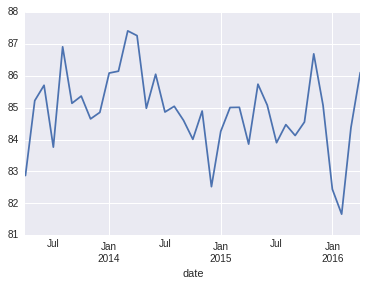

In [51]:
reampled = merged_violation_relative_score.resample("M").mean()['score'].plot()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 39921 entries, 2014-07-29 to 2016-04-11
Data columns (total 6 columns):
business_id    39921 non-null int64
date           39921 non-null datetime64[ns]
description    39921 non-null object
score          38846 non-null float64
type           38846 non-null object
date_int       39921 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 2.1+ MB


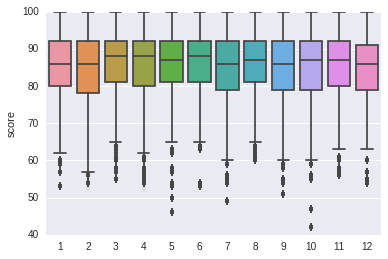

In [52]:
merged_violation_relative_score.info()
merged_violation_relative_score.index = merged_violation_relative_score['date']
sns.boxplot(x=merged_violation_relative_score.index.month, y='score', data=merged_violation_relative_score)

In [53]:
len(merged_violation_relative_score['business_id'].unique())

5022

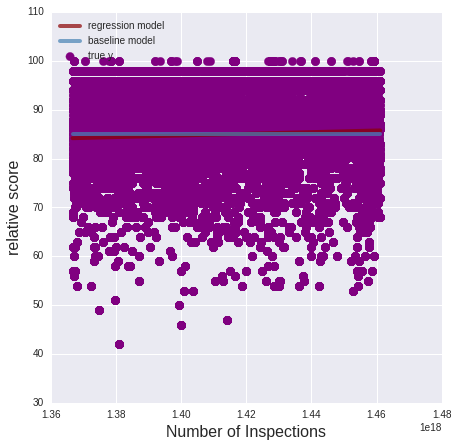

In [58]:
lm = linear_model.LinearRegression()
y_1, X_1 = patsy.dmatrices(formula_like='score ~ date_int -1',
                       data = merged_violation_relative_score,
                       return_type='dataframe')
model = lm.fit(X_1,y_1)
predictions = model.predict(X_1)
plot_regression_wbaseline(X_1, y_1, predictions, 'Number of Inspections', 'relative score')

In [59]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV, ElasticNet
from sklearn import grid_search

num_alpha = np.arange(1, 200, 5)

search_parameters = {
    'alpha': num_alpha,
    'fit_intercept':  [True, False], 
    'normalize':      [False, True]
}


lasso = Lasso()
estimator = grid_search.GridSearchCV(lasso, search_parameters, cv=5)
results = estimator.fit(X_1, y_1)

print 'LASSO ----------'
print 'Best est: ', results.best_estimator_
print 'Best params: ', results.best_params_
print 'Best  score: ', results.best_score_

ridge = Ridge()
search_params = {
    'alpha' : np.logspace(0, 10, 2)
}



ridge_estimate = grid_search.GridSearchCV(ridge, search_params, cv=5)


r_results = ridge_estimate.fit(X_1,y_1)

print 'RIDGE -------'
print r_results.best_estimator_
print 'Best Alpha: ', r_results.best_params_
print 'Best score: ', r_results.best_score_

elas = ElasticNet()

elas_params = {
    'l1_ratio': np.linspace(0.01, 1.0, 50)
}

elas_estimate = grid_search.GridSearchCV(elas, elas_params, cv=5)

e_results = elas_estimate.fit(X_1, y_1)
print 'ELASTIC NET-------'
print 'Best est: ', e_results.best_estimator_
print 'Best params: ', e_results.best_params_
print 'Best  score: ', e_results.best_score_

LASSO ----------
Best est:  Lasso(alpha=106, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
Best params:  {'normalize': False, 'alpha': 106, 'fit_intercept': True}
Best  score:  -0.00700594511743
RIDGE -------
Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)
Best Alpha:  {'alpha': 1.0}
Best score:  -0.00700594511743
ELASTIC NET-------
Best est:  ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.01,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
Best params:  {'l1_ratio': 0.01}
Best  score:  -0.00700594511743


In [ ]:
'''
The regression of the stores that apeared in the vilations.csv file wasn't
conclusive about a relationship between the overall score of a business and
the time of the year, however there is a pattern observed in the first
graph, and further explored in the boxplot by the min values of the boxplots
that shows dips in mean score for common times of the year around the end of the year.
I also believe there are logical outliers in the dataset as even after exclusively
merging the inspections dataset to the violations dataset, there were businesses
that ended up scoring above 90, and sometimes perfectly with 100. This is seemingly
impossible as for the business to appear in the violations dataset, I would imagine 
that they would, by default, have a score < 100.
'''

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Bias-variance tradeoff

---

1. Select San Francisco data of your choice and construct a regularized regression model (this can be data from an earlier analysis if you like). Ideally the model should actually improve across regularization strengths...
- Gridsearch the regularization parameters to find the optimal.
- Plot the regularization parameter against the cross-validated $R^2$.
- Explain how regularization and regularization strength is related to the bias-variance tradeoff.


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 5.1 Calculate the approximated $\text{bias}^2$ and variance across regularization strengths.

---

You can obviously use my code from the bias-variance lab to do this. 

Plot the bias and variance change _with_ the cross-validated $R^2$. 

You'll need to scale these values somehow to put them on the same chart (I recommend (MinMaxScaler)[http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html] to put $\text{bias}^2$ and variance on the same scale as cross-validated $R^2$.

<img src="http://imgur.com/HNPKfE8.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 6. Custom regularized regression penalties

---

The $\lambda1$ and $\lambda2$ norm regularization penalties (Lasso and Ridge) are the most commonly used regularization penalties. They have a solid foundation in statistics and evidence of effectiveness. However, these are not the only possible penalties for regression – sometimes new, customized penalties give additional performance and predictive power to models depending on the context.

For example, when I worked in neuroscience [we created an effective penalized regression dubbed "GraphNet"](http://arxiv.org/abs/1110.4139) that combined the Lasso and Ridge penalties like in Elastic net with a third penalty that rewarded clustering of coefficients according to physical distance in FMRI brain activation data.

**Devise of and implement a penalized regression for San Francisco data.** What is your rationale – why would this be useful? How does it perform compared to the standard Ridge, Lasso, and Elastic Net penalties?